In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
pd.options.mode.chained_assignment = None
%matplotlib inline

## Data consolidation
Player statistics are stored season by season from 2014-15 to 2019-20 in csv files in data folder. We consolidate data from all files in one data frame

In [30]:
#os.chdir("./data")
df_main=pd.DataFrame()


for f in glob.glob('*.csv'):
    df_temp = pd.read_csv(f,index_col=0)
    df_temp["Year"]=f[0:-4]
    df_main = df_main.append(df_temp, ignore_index=True)


display(df_main.head())

,player_name,teams_played_for,league,games,minutes_played,goals,npg,assists,xG,xA,...,xA90,npxG90,position,shots,key_passes,yellow_cards,red_cards,xGBuildup,xGChain,Year
0,Sergio Agüero,Manchester City,EPL,33,2551,26,21,8,25.270160,5.568922,...,0.196473,0.730414,F S,148,33,4,0,6.878173,27.805155,2014-2015
1,Harry Kane,Tottenham,EPL,34,2589,21,19,4,17.157292,3.922501,...,0.136356,0.517051,F M S,112,27,4,0,5.549699,16.488439,2014-2015
2,Diego Costa,Chelsea,EPL,26,2111,20,19,3,15.219104,4.554671,...,0.194183,0.616397,F S,76,41,8,0,5.276973,21.365790,2014-2015
3,Charlie Austin,Queens Park Rangers,EPL,35,3078,18,15,5,17.881850,2.548747,...,0.074525,0.411580,F,131,23,4,1,3.041321,13.718276,2014-2015
4,Alexis Sánchez,Arsenal,EPL,35,2967,16,16,8,13.451750,8.494180,...,0.257660,0.384952,F M S,122,82,4,0,10.736753,27.157572,2014-2015


### Data preprocessing

#### Part 1: Checking for missing values

In [31]:
cols=df_main.columns
num_cols = df_main._get_numeric_data().columns
categorical_cols=list(set(cols) - set(num_cols))
print("Null values in categorical columns")
categorical_cols
print(df_main[categorical_cols].isnull().sum())
print(f"Total records in the dataframe {df_main.shape[0]}")
df_main.describe()

Null values in categorical columns
position            0
Year                0
teams_played_for    0
player_name         0
league              0
dtype: int64
Total records in the dataframe 15835


,games,minutes_played,goals,npg,assists,xG,xA,npxG,xG90,xA90,npxG90,shots,key_passes,yellow_cards,red_cards,xGBuildup,xGChain
count,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000
mean,19.078055,1353.993053,1.816040,1.656520,1.273571,1.857392,1.305045,1.699732,0.136634,0.092785,0.128523,17.226902,12.762488,2.756299,0.142911,2.839344,4.851395
std,11.294617,988.617352,3.465752,3.081529,2.049515,3.170429,1.834830,2.791986,0.376238,0.314331,0.370261,22.162948,15.884216,2.791868,0.390909,3.093896,5.266651
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,437.000000,0.000000,0.000000,0.000000,0.082106,0.064196,0.081771,0.012273,0.008143,0.012213,2.000000,1.000000,0.000000,0.000000,0.547589,0.976102
50%,20.000000,1260.000000,0.000000,0.000000,0.000000,0.678697,0.589325,0.662080,0.056158,0.052031,0.054164,9.000000,7.000000,2.000000,0.000000,1.941877,3.265872
75%,29.000000,2171.000000,2.000000,2.000000,2.000000,2.174913,1.818488,2.051100,0.167209,0.122762,0.157152,24.000000,19.000000,4.000000,0.000000,4.053147,6.973745
max,38.000000,3420.000000,48.000000,38.000000,20.000000,39.308761,20.620707,32.117727,22.952204,18.232366,22.952204,227.000000,146.000000,17.000000,5.000000,28.058852,54.753610


As we can see, none of the categorical columns have missing values. Further, all numeric columns have same number of records as total records in the dataframe which means numeric columns too do not have any missing values

#### Part 2: Data filtering


Before we analyze data, we would remove player records with following conditions:
1. Players that played for multiple clubs in top 5 leagues in the same season (due to a loan deal or permanent transfer in winter transfer window). This is because the dataset only proveds overall season record and does not break it down by respective teams the player played for


2. Players that played for <=600 minutes

In [32]:
#Filtering out players who played for two clubs in same season
df_main=df_main[df_main['teams_played_for'].apply((lambda x: False if(len(x.split(",")))>1 else True) )]  

#Filtering out players who played less than 600 minutes
df_main=df_main[df_main['minutes_played']>=600] 
display(df_main)

,player_name,teams_played_for,league,games,minutes_played,goals,npg,assists,xG,xA,...,xA90,npxG90,position,shots,key_passes,yellow_cards,red_cards,xGBuildup,xGChain,Year
0,Sergio Agüero,Manchester City,EPL,33,2551,26,21,8,25.270160,5.568922,...,0.196473,0.730414,F S,148,33,4,0,6.878173,27.805155,2014-2015
1,Harry Kane,Tottenham,EPL,34,2589,21,19,4,17.157292,3.922501,...,0.136356,0.517051,F M S,112,27,4,0,5.549699,16.488439,2014-2015
2,Diego Costa,Chelsea,EPL,26,2111,20,19,3,15.219104,4.554671,...,0.194183,0.616397,F S,76,41,8,0,5.276973,21.365790,2014-2015
3,Charlie Austin,Queens Park Rangers,EPL,35,3078,18,15,5,17.881850,2.548747,...,0.074525,0.411580,F,131,23,4,1,3.041321,13.718276,2014-2015
4,Alexis Sánchez,Arsenal,EPL,35,2967,16,16,8,13.451750,8.494180,...,0.257660,0.384952,F M S,122,82,4,0,10.736753,27.157572,2014-2015
5,Olivier Giroud,Arsenal,EPL,27,1871,14,14,3,8.846344,3.860136,...,0.185683,0.425532,F S,70,29,5,1,4.129247,13.639880,2014-2015
6,Eden Hazard,Chelsea,EPL,38,3389,14,11,9,12.016092,11.238891,...,0.298466,0.238249,M,78,100,2,0,19.476321,31.840571,2014-2015
7,Saido Berahino,West Bromwich Albion,EPL,38,2940,14,10,1,13.841753,1.961661,...,0.060051,0.330524,F M S,86,28,2,0,2.439558,11.907294,2014-2015
8,Christian Benteke,Aston Villa,EPL,29,2380,13,12,2,8.455074,2.921320,...,0.110470,0.290946,F S,80,33,1,1,2.198609,8.725396,2014-2015
9,David Silva,Manchester City,EPL,32,2682,12,12,7,9.096988,10.388413,...,0.348604,0.305268,M,66,92,8,0,16.633573,29.144278,2014-2015


## Part 1: Which league has the most attacking defenders across Europe's top 5 league in the last 6 seasons?

Text(0.5,1,'Total goals+assists per 90 by defenders from season 14-15 to 19-20')

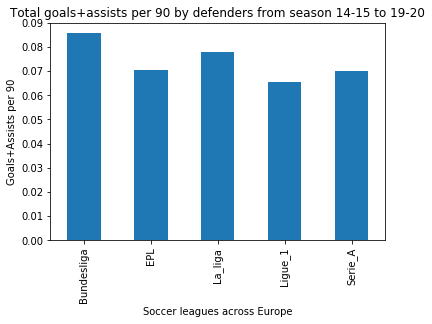

In [33]:
#Finding all players who are defenders
df_defenders=df_main[df_main["position"]=='D']

#Finding total goals + assists per 90 mins for all defenders
df_defenders["g+a"]=df_defenders["goals"]+df_defenders["assists"]
df_defenders["g+a per 90"]=(df_defenders["g+a"]/df_defenders['minutes_played'])*90

##Finding average goals+assist per 90 for defenders in each league
df_ga_per90=df_defenders.groupby(['league'])["g+a per 90"].mean()
plt.figure()
df_ga_per90.plot.bar()
plt.xlabel("Soccer leagues across Europe")
plt.ylabel("Goals+Assists per 90")
plt.title("Total goals+assists per 90 by defenders from season 14-15 to 19-20")


Text(0.5,1,'Total goals+assists per 90 by defenders for each season from 14-15 to 19-20')

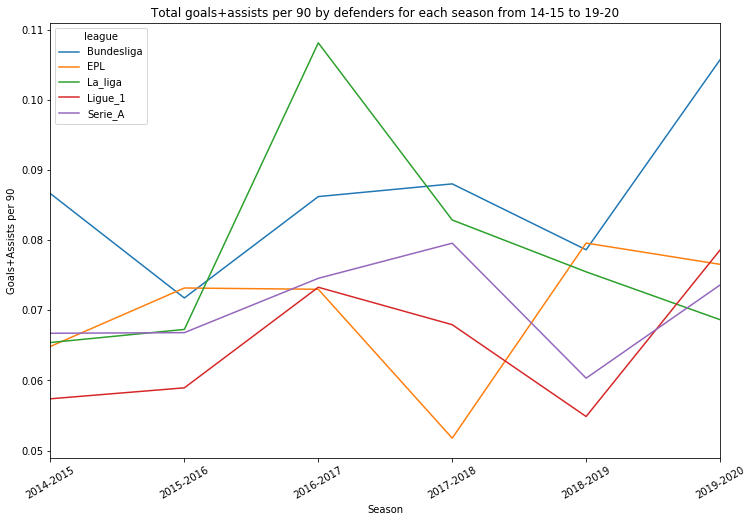

In [34]:
#Finding goals+assists per 90 by defenders for each league across 5 seasons from 2014-15 to 2019-20
df_ga_per90_league=df_defenders.groupby(['Year','league'])["g+a per 90"].mean()

plot_df = df_ga_per90_league.unstack('league')


plot_df.plot(figsize=(12,8))
plt.xlabel("Season")
plt.ylabel("Goals+Assists per 90")

plt.xticks(rotation=30)

plt.title("Total goals+assists per 90 by defenders for each season from 14-15 to 19-20")

## Part 2 - Expectation vs Reality: Which teams outperformed their expected goals measure and which teams underperformed? How is related to performance in the league in that year?

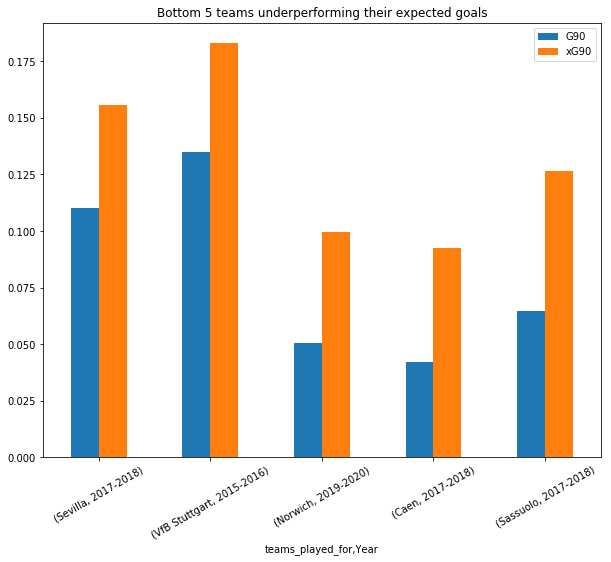

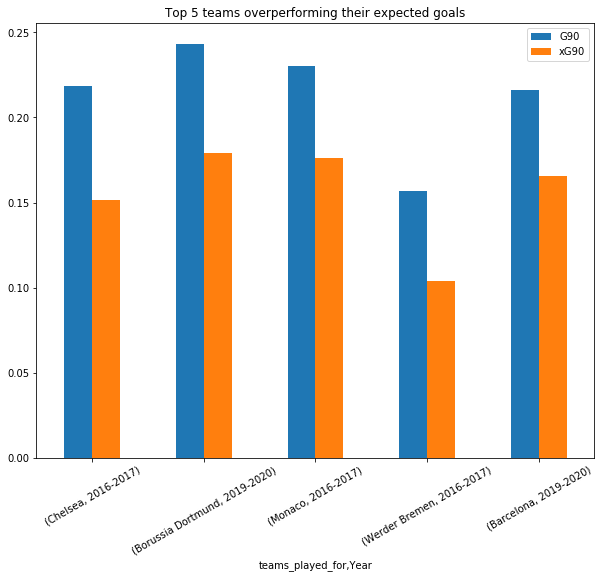

In [38]:
#Finding goals per 90 mins for all players
df_filter_tg=df_main.copy()
df_filter_tg['G90']=(df_main['goals']/df_main['minutes_played'])*90

#Finding goals and expected goals per 90 min for each team in last 5 years
df_teams=df_filter_tg.groupby(['teams_played_for','Year'])[["G90","xG90"]].mean()

#Finding difference of goals and expected goals per 90 mins for each team in last 5 years
df_teams['diff']=df_teams["G90"]-df_teams["xG90"]
df_teams=df_teams.sort_values(by='diff', ascending=False)

#Finding bottom 5 teams underperforming their expected goals measure
df_teams[["G90","xG90"]].tail().plot.bar(rot=30,figsize=(10,8))
plt.title("Bottom 5 teams underperforming their expected goals")

#Finding top 5 teams overperforming their expected goals measure
df_teams[["G90","xG90"]].head().plot.bar(rot=30,figsize=(10,8))
plt.title("Top 5 teams overperforming their expected goals")

df_teams_out_prfm=df_teams[df_teams["diff"]>=0.025]
df_teams_out_prfm=df_teams_out_prfm.reset_index()
v = df_teams_out_prfm.teams_played_for.value_counts()

Text(0.5,1,'Distribution of diff between actual and expected goals per 90 for teams across top 5 leagues from 2014-15 to 2019-20')

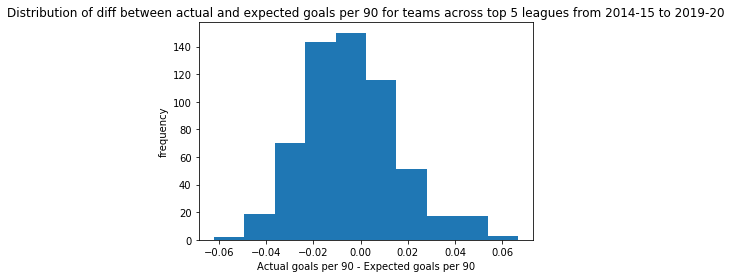

In [39]:
plt.hist(df_teams["diff"])
plt.xlabel("Actual goals per 90 - Expected goals per 90")
plt.ylabel("frequency")
plt.title("Distribution of diff between actual and expected goals per 90 for teams across top 5 leagues from 2014-15 to 2019-20")

## Part 3 - Which teams were most dependent on a single player?: a Gini coefficient analysis